In [ ]:
# remove warnings
import warnings
warnings.filterwarnings("ignore")
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# SQL query
import wrangle
# fill missing values
from sklearn.impute import SimpleImputer

Acquire the data

In [ ]:
# use the wrangle.py file to get the zillow data
zillow_data = wrangle.get_zillow17_data()

In [ ]:
# summerize the data
zillow_data.head()


In [ ]:
# Look at the data types
zillow_data.info()

In [ ]:
zillow_data.shape

Take aways:

- Alot of the data is missing
- There are some redundant columns(unnamed_0, id, index)
- IDs that refered to extenal sources need to join in

1. Acquire bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips from the zillow database for all 'Single Family Residential' properties.

Prepare the data

In [ ]:
# check for missing values
zillow_data.isnull().sum()

In [ ]:
# fill all missing values utilizing simple imputation
imputer = SimpleImputer(strategy='median')

In [ ]:
# create a loop to impute the missing values exclude the fips and yearbuilt columns
for col in zillow_data.columns:
    if col not in ['fips', 'yearbuilt']:
        zillow_data[col] = imputer.fit_transform(zillow_data[col].values.reshape(-1, 1))

In [ ]:
# check for missing values
zillow_data.isnull().sum()

In [ ]:
# identify the outliers
zillow_data.describe().T

In [ ]:
# visualize the distribution of each column
for col in zillow_data.columns:
        plt.figure(figsize=(10, 6))
        sns.distplot(zillow_data[col], bins=50)
        plt.show()

In [ ]:
# create a loop thats removes the outliers from all columns except fips
for col in zillow_data.columns:
        if col != 'fips':
                zillow_data = wrangle.remove_outliers(zillow_data, 1.5, col)

In [ ]:
# check the data again
zillow_data.describe().T

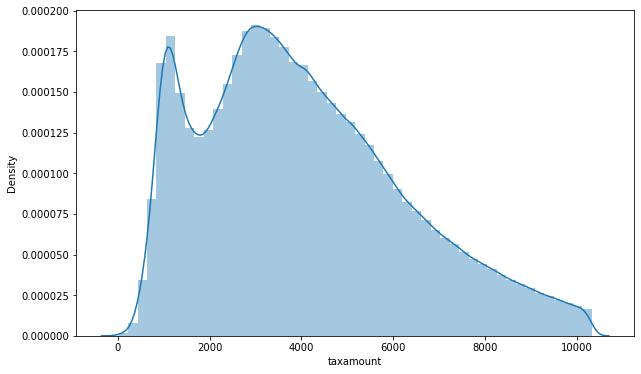

In [14]:
# visualize the distribution of each column
for col in zillow_data.columns:
    if col not in ['fips', 'yearbuilt']:
        plt.figure(figsize=(10, 6))
        sns.distplot(zillow_data[col], bins=50)
        plt.show()

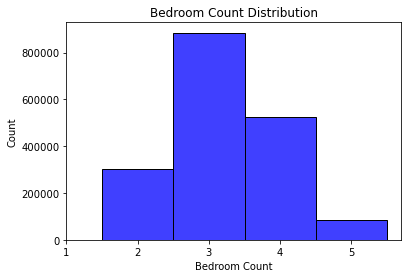

In [15]:
# bedroomcnt distribution utilizing histogram with lables
sns.histplot(zillow_data['bedroomcnt'], bins=20, color='blue', edgecolor='black', discrete=True)
plt.xticks(np.arange(1, 6, 1))
plt.xlabel('Bedroom Count')
plt.ylabel('Count')
plt.title('Bedroom Count Distribution')
plt.show()

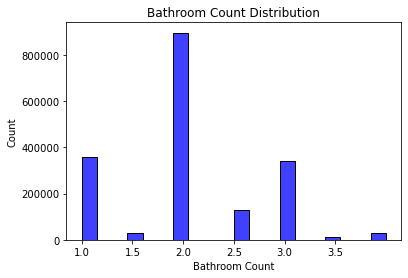

In [16]:
# bathroomcnt distribution with lables
sns.histplot(zillow_data['bathroomcnt'],bins=20, color='blue', edgecolor='black')
plt.xticks(np.arange(1, 4, .5))
plt.xlabel('Bathroom Count')
plt.ylabel('Count')
plt.title('Bathroom Count Distribution')
plt.show()

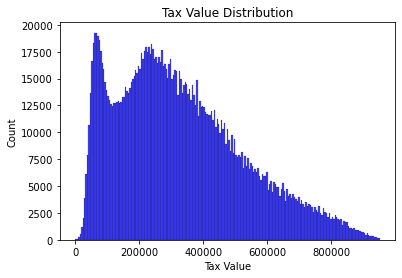

In [17]:
# taxvaluedollarcnt distribution with lables
sns.histplot(zillow_data['taxvaluedollarcnt'], color='blue', edgecolor='black')
plt.xlabel('Tax Value')
plt.ylabel('Count')
plt.title('Tax Value Distribution')
plt.show()

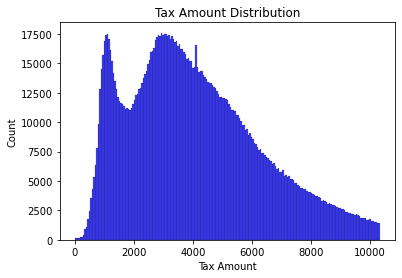

In [18]:
# taxamount distribution with lables
sns.histplot(zillow_data['taxamount'], color='blue', edgecolor='black')
plt.xlabel('Tax Amount')
plt.ylabel('Count')
plt.title('Tax Amount Distribution')
plt.show()

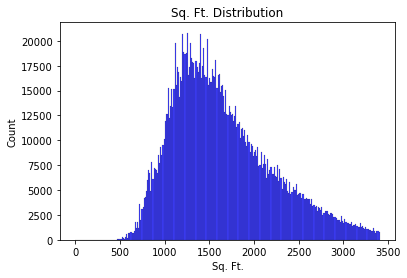

In [19]:
# calculatedfinishedsquarefeet distribution with lables
sns.histplot(zillow_data['calculatedfinishedsquarefeet'], color='blue', edgecolor='black')
plt.xlabel('Sq. Ft.')
plt.ylabel('Count')
plt.title('Sq. Ft. Distribution')
plt.show()

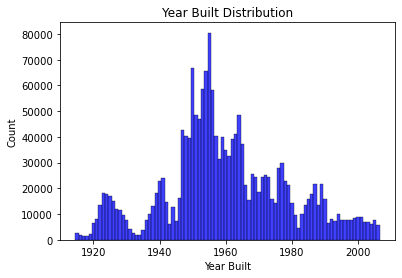

In [20]:
# yearbuilt distribution with lables
sns.histplot(zillow_data['yearbuilt'], color='blue', edgecolor='black', discrete=True)
plt.xlabel('Year Built')
plt.ylabel('Count')
plt.title('Year Built Distribution')
plt.show()

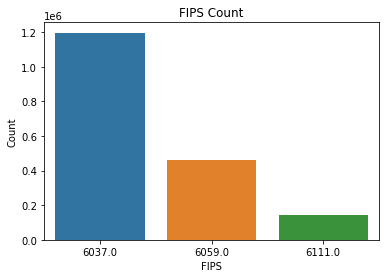

In [21]:
# visualize fibs with a countplot
sns.countplot(zillow_data['fips'])
plt.xlabel('FIPS')
plt.ylabel('Count')
plt.title('FIPS Count')
plt.show()